# PERMUTATION IMPORTANCE

In [1]:
# Carregar os módulos

import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar o dataset

diabetes = load_diabetes()

In [3]:
# Descrição do dataset

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Verificar as chaves do dataset

diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
# Verificar as feature

diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
# Verificar o target

diabetes.target[0:30]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283.])

In [7]:
# Verificar os dados

diabetes.data[0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [8]:
# Separar os dados

X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)

# Criar o modelo

model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

0.35666062386954556

## PERMUTATION

In [9]:
# Carregando o módulo de permutation importance

from sklearn.inspection import permutation_importance

# Gerando os resultados

resultado = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=42)

In [10]:
# keys dos resultados

resultado.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [11]:
# Médias dos resultados

resultado['importances_mean']

array([-0.0049707 ,  0.04163488,  0.16078348,  0.09237492,  0.03914647,
        0.00273191,  0.00387479,  0.00478002,  0.18063125,  0.00226848])

In [12]:
# Média do desvio padrão

resultado['importances_std']

array([0.00341944, 0.0195145 , 0.05349226, 0.03321336, 0.02540448,
       0.00221707, 0.01550943, 0.01137109, 0.06486485, 0.00322069])

In [13]:
# Resultado de importancias

resultado['importances'][0:2]

array([[-0.00780574, -0.01187699, -0.00865904, -0.00862264, -0.00461426,
        -0.00565643,  0.00131309, -0.00755087, -0.01249394, -0.00341946,
         0.00062344, -0.00240999, -0.00799873,  0.00096927, -0.00784774,
        -0.00466057, -0.00358763, -0.00298887, -0.00436497, -0.00038463,
        -0.00615755, -0.00408928, -0.00383071, -0.00579813, -0.0066441 ,
        -0.00120385, -0.0010613 , -0.00534192, -0.00776537, -0.00519222],
       [ 0.06685408,  0.04374728,  0.02707905,  0.02750161,  0.03457145,
         0.02907597,  0.04825478,  0.02772452,  0.03085989,  0.05941806,
         0.08685031,  0.00793484,  0.04940073,  0.0269297 ,  0.01596074,
         0.04080358,  0.0789672 ,  0.01875013,  0.07519529,  0.05490094,
         0.06400857,  0.03583372,  0.05238168,  0.0417495 ,  0.04715552,
         0.04221507,  0.05302921,  0.0168014 ,  0.02132305,  0.02376867]])

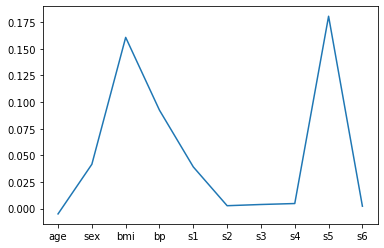

In [14]:
# Plot da médias

plt.plot(diabetes.feature_names, resultado['importances_mean'])

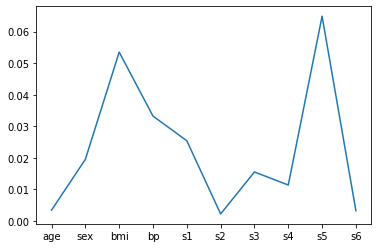

In [15]:
# Plot do desvio padrão

plt.plot(diabetes.feature_names, resultado['importances_std'])

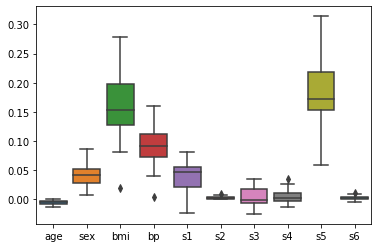

In [16]:
# Plot dos importancias

dd = pd.DataFrame(resultado['importances'].T, columns=diabetes.feature_names)

sns.boxplot(data=dd)

In [17]:
# Print dos resultados

for i in resultado.importances_mean.argsort()[::-1]:
     if resultado.importances_mean[i] - 2 * resultado.importances_std[i] > 0:
         print(f"{diabetes.feature_names[i]:<8}"
               f"{resultado.importances_mean[i]:.3f}"
               f" +/- {resultado.importances_std[i]:.3f}")

s5      0.181 +/- 0.065
bmi     0.161 +/- 0.053
bp      0.092 +/- 0.033
sex     0.042 +/- 0.020
